In [1]:
from lxlift import lift

In [2]:
l = lift()

lx16a servo found in path: /dev/ttyUSB0
init complete


In [3]:
l.wait_for_switch(time=1, wait_for=[22, 27])

True

In [18]:
l.move_down(seconds=None, speed=2000)

In [9]:
l.stop_lx16a()

In [15]:
l.move_up(seconds=25, speed=2000)

In [22]:
l.activate_lx16a(1000)

In [6]:
# lift pins setup
import RPi.GPIO as GPIO
GPIO.setmode(GPIO.BCM)
gpio_ins=[22, 27]
gpio_outs=[4, 17]

In [10]:
val = 0
nums = gpio_outs
for num in nums:
    GPIO.output(num, val)

In [46]:
[GPIO.input(22), GPIO.input(27)]

[0, 0]

In [9]:
import numpy as np
i = 0
while (not np.any([GPIO.input(22), GPIO.input(27)])):
    i += 1
print('switch activated')

switch activated


In [13]:
from adafruit_servokit import ServoKit
kit = ServoKit(channels=16)

In [34]:
kit.servo[12].angle = 100


In [1]:
from parse_and_control import Motors

In [1]:
import listen

In [2]:
listen.listen()

INFO:root:say hi bidi to start conversation ...
DEBUG:snowboy:detecting...
INFO:snowboy:detect started.
INFO:snowboy:Keyword 2 detected at time: 2020-10-16 17:10:19
INFO:snowboy:detect stopped.
DEBUG:snowboy:detect voice break
DEBUG:snowboy:finished.
INFO:root:talk to bidi, dont be shy...


now listening


DEBUG:google.auth.transport.requests:Making request: POST https://oauth2.googleapis.com/token
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): oauth2.googleapis.com:443
DEBUG:urllib3.connectionpool:https://oauth2.googleapis.com:443 "POST /token HTTP/1.1" 200 None
INFO:aiy.cloudspeech:Start listening.
INFO:aiy.cloudspeech:Stop listening.


what time is it
bidi heard: what time is it


INFO:root:say hi bidi to start conversation ...
DEBUG:snowboy:detecting...
INFO:snowboy:detect started.
INFO:snowboy:detect stopped.


KeyboardInterrupt: 

In [1]:
import RPi.GPIO as GPIO
GPIO.setmode(GPIO.BCM)

In [2]:
ENC1, ENC2 = 12, 24
GPIO.setup(ENC1, GPIO.IN)
GPIO.setup(ENC2, GPIO.IN)

In [23]:
import time
start_time = time.time()
period = 0.01
right_update_value = 0

vals, As, Bs = [], [], []
while (time.time() - start_time < period):
    right_A = GPIO.input(ENC2)
    right_B = GPIO.input(ENC1)
    As.append(right_A)
    Bs.append(right_B)
    
    right_update_value = (right_update_value << 2 | right_A << 1 | right_B) & 0b00001111
#     print((right_update_value << 2 | right_A << 1 | right_B), right_update_value)
    vals.append(right_update_value)
print(len(vals), right_A, right_B)

2027 1 1


In [25]:
As

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


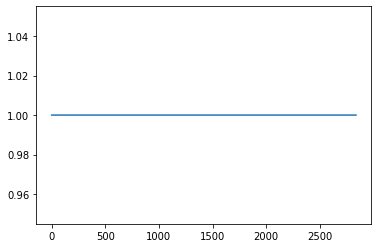

In [16]:
import matplotlib.pyplot as plt

plt.plot(Bs)
plt.show()

In [22]:
period = 0.01
start_time = time.time()

last_AA = 0b00
counter_A = 0
outcome = [0,-1,1,0,-1,0,0,1,1,0,0,-1,0,-1,1,0]


while (time.time() - start_time < period):

    left_A = GPIO.input(ENC1)
    right_A = GPIO.input(ENC2)
    current_aa = (left_A << 1) | right_A
    position = (last_AA << 2) | current_aa
    counter_A += outcome[position]
    last_AA = current_aa
    print('A = ', counter_A)



    #print('final counter of A = ', counter_A)
    #print('final counter of B = ', counter_B)

A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
A =  0
